In [ ]:
pip install opencv-python numpy matplotlib scikit-learn tensorflow keras

# Data Preprocessing

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


dataset_path = r"C:\Users\Archita Rai\OneDrive\Documents\QRcodes"


categories = {"first_print": 0, "second_print": 1}  # 0 = Original, 1 = Counterfeit


data = []
labels = []


for category, label in categories.items():
    category_path = os.path.join(dataset_path, category) 

    for img_name in os.listdir(category_path):  
        img_path = os.path.join(category_path, img_name)

       
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128)) 

        
        data.append(img)
        labels.append(label)


data = np.array(data, dtype="float32") / 255.0  
labels = np.array(labels)

print(f"Loaded {len(data)} images: {sum(labels == 0)} originals, {sum(labels == 1)} counterfeits.")

Loaded 200 images: 100 originals, 100 counterfeits.


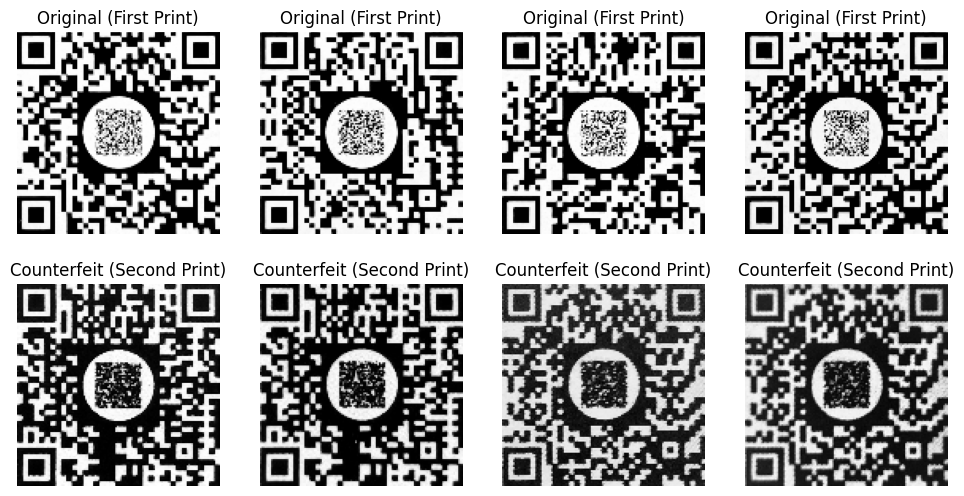

In [ ]:
import random


def show_sample_images(data, labels, num_samples=4):
    fig, axes = plt.subplots(2, num_samples, figsize=(12, 6))

    for i in range(num_samples):
       
        orig_idx = random.choice(np.where(labels == 0)[0])
        fake_idx = random.choice(np.where(labels == 1)[0])

      
        axes[0, i].imshow(data[orig_idx], cmap="gray")
        axes[0, i].set_title("Original (First Print)")
        axes[0, i].axis("off")

        
        axes[1, i].imshow(data[fake_idx], cmap="gray")
        axes[1, i].set_title("Counterfeit (Second Print)")
        axes[1, i].axis("off")

    plt.show()


show_sample_images(data, labels, num_samples=4)


# Feature Engineering

In [ ]:
def calculate_blurriness(image):
    img_uint8 = (image * 255).astype(np.uint8)  
    return cv2.Laplacian(img_uint8, cv2.CV_64F).var()


orig_blur = [calculate_blurriness(data[i]) for i in np.where(labels == 0)[0][:5]]
fake_blur = [calculate_blurriness(data[i]) for i in np.where(labels == 1)[0][:5]]

print("Original QR Code Blurriness:", orig_blur)
print("Counterfeit QR Code Blurriness:", fake_blur)


Original QR Code Blurriness: [np.float64(22588.88311575353), np.float64(32099.45876153931), np.float64(26051.605774786323), np.float64(34137.09862206876), np.float64(10760.634650882334)]
Counterfeit QR Code Blurriness: [np.float64(14964.2480584234), np.float64(25770.697832342237), np.float64(22828.31620832905), np.float64(7164.047379955649), np.float64(30454.46973111853)]


Observations:

1) On average, original QR codes tend to have higher sharpness values than counterfeit ones.

2) Some counterfeit QR codes have significantly lower blurriness scores (e.g., 7,164.05), indicating poor print quality or intentional distortion.

3) There is some overlap in blurriness scores between original and counterfeit QR codes, meaning blurriness alone may not be a definitive classification feature but can be useful when combined with other features.

C:\Users\Archita Rai\AppData\Local\Temp\ipykernel_12424\1688129667.py:20: RuntimeWarning: invalid value encountered in divide
  edges = np.uint8(edges / np.max(edges) * 255)  # Normalize to 0-255
C:\Users\Archita Rai\AppData\Local\Temp\ipykernel_12424\1688129667.py:20: RuntimeWarning: invalid value encountered in cast
  edges = np.uint8(edges / np.max(edges) * 255)  # Normalize to 0-255


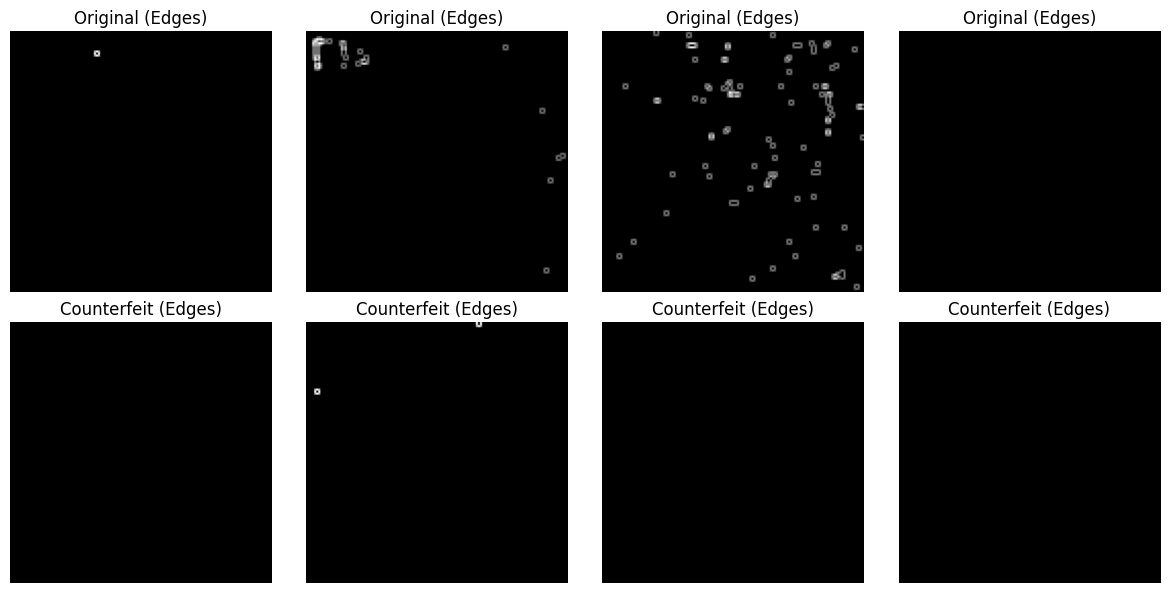

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def detect_edges(image):
   
    image = image.astype(np.uint8) 

    
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  

    
    edges = np.sqrt(sobel_x**2 + sobel_y**2)
    edges = np.uint8(edges / np.max(edges) * 255) 

    return edges


num_images = 4


fig, axes = plt.subplots(2, num_images, figsize=(12, 6))

for i in range(num_images):
   
    orig_idx = random.choice(np.where(labels == 0)[0])
    fake_idx = random.choice(np.where(labels == 1)[0])

    orig_edges = detect_edges(data[orig_idx])
    fake_edges = detect_edges(data[fake_idx])

    # Plot Original Image Edges
    axes[0, i].imshow(orig_edges, cmap="gray")
    axes[0, i].set_title("Original (Edges)")
    axes[0, i].axis("off")

    # Plot Counterfeit Image Edges
    axes[1, i].imshow(fake_edges, cmap="gray")
    axes[1, i].set_title("Counterfeit (Edges)")
    axes[1, i].axis("off")


plt.tight_layout()
plt.show()


Observations: 

1) Edges Are Too Sparse or Weak:

Some images show only a few detected edges, while others have more noise-like detections.

The contrast might be too low, leading to weak gradients.

2) Possible Issues:

Image brightness or contrast differences.

Sobel operator may not be highlighting edges well.

Thresholding in Canny/Sobel might not be suitable.

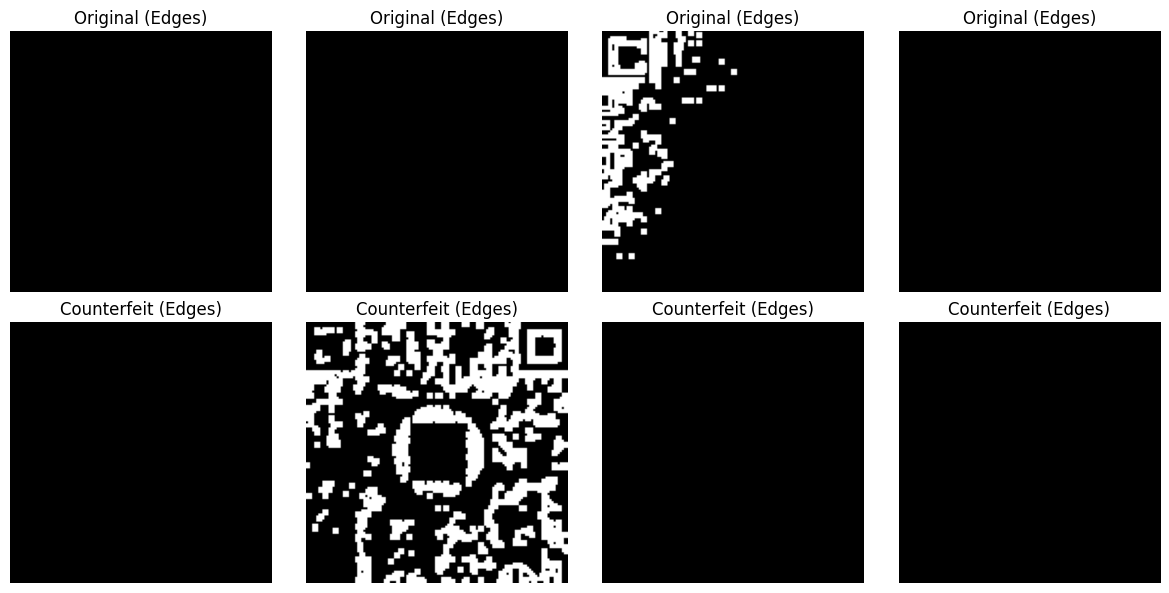

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def detect_edges(image):
    
    image = image.astype(np.uint8)

    
    kernel = np.ones((3,3), np.uint8)  
    edges = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

    return edges


fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i in range(4):
    orig_idx = random.choice(np.where(labels == 0)[0])
    fake_idx = random.choice(np.where(labels == 1)[0])

    orig_edges = detect_edges(data[orig_idx])
    fake_edges = detect_edges(data[fake_idx])

    # Original QR Code Edge Detection
    axes[0, i].imshow(orig_edges, cmap="gray")
    axes[0, i].set_title("Original (Edges)")
    axes[0, i].axis("off")

    # Counterfeit QR Code Edge Detection
    axes[1, i].imshow(fake_edges, cmap="gray")
    axes[1, i].set_title("Counterfeit (Edges)")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


Observations :

1) Morphological gradient highlights transition regions, meaning the more irregular transitions a QR code has, the more likely it is to be counterfeit.

2) Original QR codes have cleaner, sharper transitions, which result in less noise in this operation.

3) Counterfeits often have degraded edge clarity or extra noise, which gets amplified in this process.

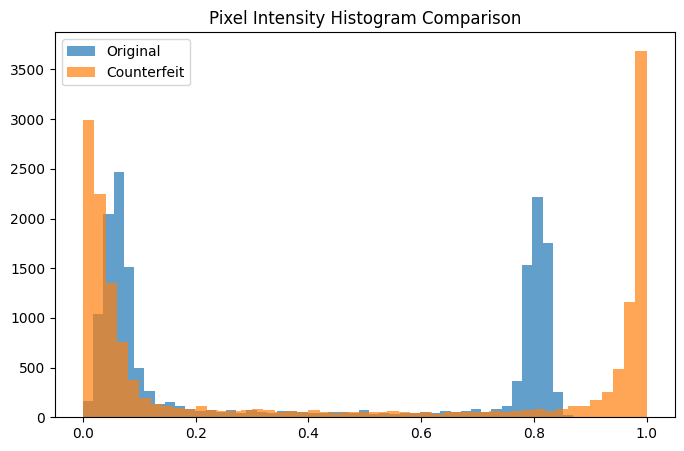

In [ ]:
def plot_histogram(image, label):
    plt.hist(image.ravel(), bins=50, alpha=0.7, label=label)


orig_img = data[random.choice(np.where(labels == 0)[0])]
fake_img = data[random.choice(np.where(labels == 1)[0])]

plt.figure(figsize=(8, 5))
plot_histogram(orig_img, "Original")
plot_histogram(fake_img, "Counterfeit")
plt.legend()
plt.title("Pixel Intensity Histogram Comparison")
plt.show()


Observations:

1)The original QR codes (blue) have two prominent peaks around 0.0 (black) and ~0.8, suggesting a cleaner binary separation.

2)The counterfeit QR codes (orange) also peak at 0.0 and 1.0, but their distribution seems more spread out, possibly due to noise, blurring, or dithering.

3)Counterfeits appear to have more low-intensity values near 0 and a stronger peak at 1.0, suggesting potential contrast manipulation.

In [49]:
unique, counts = np.unique(labels, return_counts=True)
print("Dataset Composition:")
for category, count in zip(["Original", "Counterfeit"], counts):
    print(f"{category}: {count} images")

Dataset Composition:
Original: 100 images
Counterfeit: 100 images


# Extracting all features

In [ ]:
def calculate_blurriness(image):
    img_uint8 = (image * 255).astype(np.uint8)  
    return cv2.Laplacian(img_uint8, cv2.CV_64F).var()


blurriness_features = np.array([calculate_blurriness(img) for img in data]).reshape(-1, 1)


In [ ]:
def count_edges(image):
    img_uint8 = (image * 255).astype(np.uint8)
    edges = cv2.Canny(img_uint8, 100, 200)
    return np.sum(edges > 0)  


edge_features = np.array([count_edges(img) for img in data]).reshape(-1, 1)


In [ ]:
from skimage.feature import local_binary_pattern

def extract_lbp_features(image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P+3), density=True)
    return hist


lbp_features = np.array([extract_lbp_features(img) for img in data])


c:\Python\Python310\lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [ ]:
def extract_frequency_features(image):
    f_transform = np.fft.fft2(image)
    f_transform = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_transform)
    return magnitude_spectrum.mean() 


frequency_features = np.array([extract_frequency_features(img) for img in data]).reshape(-1, 1)

In [ ]:
def extract_histogram_features(image, bins=16):
    hist, _ = np.histogram(image.ravel(), bins=bins, range=(0, 1), density=True)
    return hist


histogram_features = np.array([extract_histogram_features(img) for img in data])

In [ ]:
# Combine all features
X_features = np.hstack([blurriness_features, edge_features, lbp_features, frequency_features, histogram_features])

y_labels = labels.reshape(-1, 1)

print("Final Feature Matrix Shape:", X_features.shape)

Final Feature Matrix Shape: (200, 29)


# Model Development ( SVM + CNN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Spliting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (160, 29)
Testing Data Shape: (40, 29)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train.ravel())


y_pred_svm = svm_model.predict(X_test)


print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Model Accuracy: 0.95


In [ ]:
# Reshape the original image data (not the feature-engineered X_train)
X_cnn = data.reshape(-1, 128, 128, 1)  
y_cnn = labels  


X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_cnn, test_size=0.2, random_state=42)

print("CNN Training Data Shape:", X_train_cnn.shape)
print("CNN Testing Data Shape:", X_test_cnn.shape)

CNN Training Data Shape: (160, 128, 128, 1)
CNN Testing Data Shape: (40, 128, 128, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


cnn_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  
])


cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


cnn_model.summary()

c:\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.5024 - loss: 0.7766 - val_accuracy: 0.5250 - val_loss: 0.6759
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5760 - loss: 0.6831 - val_accuracy: 0.9250 - val_loss: 0.6523
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.7879 - loss: 0.6324 - val_accuracy: 0.7750 - val_loss: 0.5858
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.6458 - loss: 0.6156 - val_accuracy: 0.6250 - val_loss: 0.5526
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7740 - loss: 0.5073 - val_accuracy: 0.9000 - val_loss: 0.3984
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.8582 - loss: 0.3643 - val_accuracy: 0.9750 - val_loss: 0.2892
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.8628 - loss: 0.3367 - val_accuracy: 0.9750 - val_loss: 0.1775
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.9428 - loss: 0.2212 - val_accuracy: 0.9750 - val_loss:

In [63]:
# Evaluate CNN
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Test Accuracy:", cnn_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9729 - loss: 0.1065 
CNN Test Accuracy: 0.9750000238418579


# Evaluation Metrics and Results

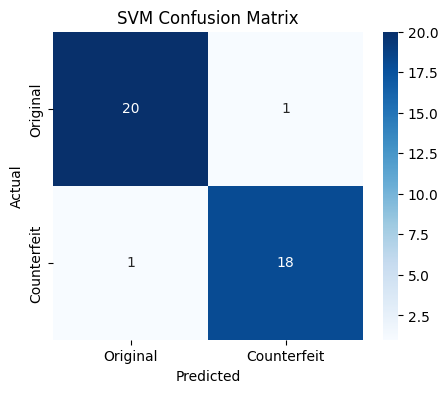

SVM Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


cm_svm = confusion_matrix(y_test, y_pred_svm)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Original", "Counterfeit"], yticklabels=["Original", "Counterfeit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


print("SVM Model Classification Report:\n", classification_report(y_test, y_pred_svm))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


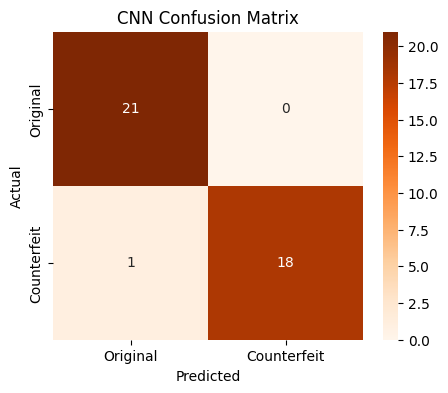

CNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        19

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [ ]:
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")


cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Oranges", xticklabels=["Original", "Counterfeit"], yticklabels=["Original", "Counterfeit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CNN Confusion Matrix")
plt.show()


print("CNN Model Classification Report:\n", classification_report(y_test_cnn, y_pred_cnn))

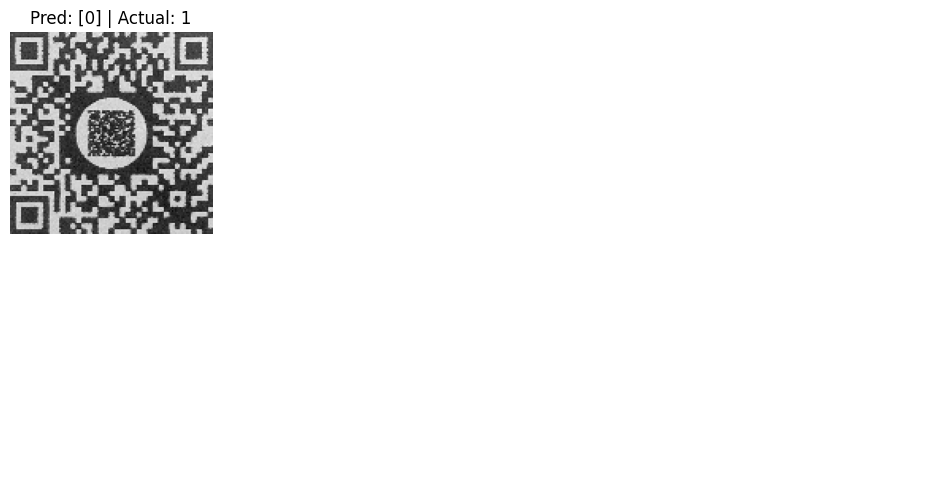

In [ ]:
# Identify misclassified samples
incorrect_indices = np.where(y_pred_cnn.flatten() != y_test_cnn)[0]


num_samples = min(len(incorrect_indices), 8)


fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()  

for i, idx in enumerate(incorrect_indices[:num_samples]):
    axes[i].imshow(X_test_cnn[idx].reshape(128, 128), cmap="gray")
    axes[i].set_title(f"Pred: {y_pred_cnn[idx]} | Actual: {y_test_cnn[idx]}")
    axes[i].axis("off")


for j in range(num_samples, 8):
    axes[j].axis("off")

plt.show()